# NLP 기초 Assignment
## NLP 제대로 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/MyDrive/2021/투빅스 정규세션/Week8')

In [3]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 8주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [4]:
spam = pd.read_csv('spam.csv')

In [5]:
spam # 데이터 출력

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
spam.iloc[5]['v2']
# 데이터에 특수문자, 대소문자 들이 섞여있다 -> data cleansing 필요

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [6]:
spam['v1'].value_counts() # ham은 4825개, spam은 747개 -> spam 메세지의 비율이 현저하게 적다

ham     4825
spam     747
Name: v1, dtype: int64

## Preprocessing

In [9]:
## 문자 모두 lower case로 맞추기

# v2의 데이터를 대상으로 대소문자 구분 제거
# list 형태로 저장
data = [line.lower() for line in spam.iloc[:,1]] 

In [10]:
data # label과 상관 없이 문자 데이터만을 분석 

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though",
 "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv",
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'had y

In [18]:
## 특수문자 제거하기
clean_data = []
for i in data: # data의 각 요소마다 특수문자 제거 
  clean_data.append(re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', i))

clean_data

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send å£150 to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea å£900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only',
 'had your mobile 11 months or more u r entitled to update

## Tokenizing
- 실습코드에서는 한국어 대상이라 konlpy를 다뤘지만, 영어는 nltk 모듈을 쓸 수 있습니다. 의미 있는 토큰으로 쪼개고 불용어도 처리해보세요! 현존하는 불용어 리스트를 사용해도 좋고, 새롭게 만들어도 좋습니다. 특수문자는 없애주고, 모두 소문자로 변환해주는 전처리도 필요하겠죠?

In [20]:
import nltk
import re 
import string

In [30]:
# 예시 코드
from nltk.tokenize import word_tokenize # 단어 tokenizing 할 때 사용
from nltk.stem import PorterStemmer # 동사 원형 찾아줄 때 사용
from nltk.corpus import stopwords # 불용어 처리시 사용

nltk.download('punkt')
nltk.download('stopwords')
stopwords.words('english')
# word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
# 불용어 처리 + tokenizing
tokenized = []
for i in data:
  # word 단위로 split
  tokens = nltk.word_tokenize(i) 

  # 단어에서 punctuation제거
  table = str.maketrans('', '', string.punctuation) 
  strip = [w.translate(table) for w in tokens] 

  # alphabet이 아닌 것 포함한 token 제거
  words = [word for word in strip if word.isalpha()] # @,*등이 섞여 있는 token 제거한 list

  # stop words 제거
  stop_words = set(stopwords.words('english')) # 불용어 list
  words = [word for word in words if not word in stop_words] # 불용어 제거한 list
  

  # 어간 추출하기 (Stemming)
  porter = PorterStemmer()  # 동사 원형 찾아줌
  stemmed = [porter.stem(word) for word in words] # 동사 원형만을 남긴 list

  # 최종 tokenized list에 append
  tokenized.append(stemmed)

tokenized[:10]

[['go',
  'jurong',
  'point',
  'crazi',
  'avail',
  'bugi',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amor',
  'wat'],
 ['ok', 'lar', 'joke', 'wif', 'u', 'oni'],
 ['free',
  'entri',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  'may',
  'text',
  'fa',
  'receiv',
  'entri',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  'appli'],
 ['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say'],
 ['nah', 'nt', 'think', 'goe', 'usf', 'live', 'around', 'though'],
 ['freemsg',
  'hey',
  'darl',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'mell',
  'mell',
  'oru',
  'minnaminungint',
  'nurungu',
  'vettam',
  'set',
  'callertun',
  'caller',
  'press',
  'copi',
  'friend',
  'callertun'],
 ['winner',
  'valu',
  'network',
  'custom',
  'select',


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

* Word2Vec 
  - CBOW
  - Skip-gram
* FastText

In [36]:
!pip install gensim # word2vec, fasttext 포함

In [37]:
from gensim.models import Word2Vec, FastText

Word2Vec parameters
- size(default100): 임베딩 차원
- window(default 5): 윈도우 크기
- min_count(default 5): 단어의 최소 빈도수 
- workers(default 3): cpu core #
- sg(default 0 or CBOW): 0일때 CBOW, 1일때 skip-gram

모델을 비교하기 위해 파라미터는 동일하게 설정하였다

### CBOW

In [39]:
cbow = Word2Vec(tokenized, 
                iter = 100,
                size = 10,
                window = 5, # 주변의 5개 단어
                min_count = 3, # 최소 3번 이상 등장한 단어들 대상
                workers = 3, 
                sg = 0)

In [40]:
cbow_vec = cbow.wv.vectors # 토큰 임베딩 벡터
cbow_vec

array([[ 1.4050459 ,  0.14251252,  0.99657065, ..., -0.4337416 ,
         0.23518142,  1.2925363 ],
       [-0.81421393,  2.0542688 , -1.5351907 , ..., -1.5716306 ,
         1.7130097 , -0.8738508 ],
       [ 0.05394837,  0.24778378,  0.32160068, ...,  1.1201599 ,
         1.2225683 ,  0.7624011 ],
       ...,
       [-0.8619136 , -1.0560087 , -1.1845121 , ...,  0.5358204 ,
         0.1995484 ,  0.71583384],
       [ 0.47387934,  1.1244187 ,  1.2842999 , ...,  0.00813881,
         1.4911478 , -0.7714362 ],
       [ 1.9112153 , -1.4519613 , -0.47260413, ...,  1.2114298 ,
         1.2557706 ,  0.8729762 ]], dtype=float32)

### Skip-Gram

In [42]:
skip_gram = Word2Vec(tokenized, 
                    iter = 100,
                    size = 10,
                    window = 5, # 주변의 5개 단어
                    min_count = 3, # 최소 3번 이상 등장한 단어들 대상
                    workers = 3, 
                    sg = 1)

In [43]:
skip_vec = skip_gram.wv.vectors # 토큰 임베딩 벡터
skip_vec 

array([[ 0.5479878 ,  0.21871872,  0.21764669, ...,  0.47351065,
         0.74452955,  0.4483836 ],
       [ 0.13039424,  0.46596214, -0.83085024, ...,  0.19101433,
         1.005175  , -0.216059  ],
       [ 0.03023256,  0.30215055,  0.05055839, ...,  0.9039771 ,
         0.8791415 ,  0.13879378],
       ...,
       [-0.68211204, -1.1147672 , -1.2281016 , ...,  1.9788806 ,
         0.47947744,  0.13814066],
       [-0.7140614 ,  1.6498791 ,  0.8279093 , ...,  0.9173655 ,
         1.9795973 ,  0.27082765],
       [ 1.3864377 , -0.46138   , -1.2794316 , ...,  0.97288316,
         0.8479087 ,  1.7107794 ]], dtype=float32)

### FastText

In [45]:
fast_text = FastText(tokenized, 
                    iter = 100,
                    size = 10,
                    window = 5, # 주변의 5개 단어
                    min_count = 3, # 최소 3번 이상 등장한 단어들 대상
                    workers = 5, # 학습 속도가 느려 cpu 더 많이 쓰게 설정
                    sg = 1)

In [46]:
fast_vec = fast_text.wv.vectors # 토큰 임베딩 벡터
fast_vec

array([[-0.492101  ,  0.08344498, -0.26581848, ..., -0.07204136,
        -0.29221228,  0.36469927],
       [-0.6152983 , -0.46521676, -0.12744541, ...,  0.21209835,
        -0.6317531 ,  1.1467029 ],
       [-0.10671343,  0.27815893, -0.0123761 , ..., -0.40998074,
        -0.23357463,  0.94780123],
       ...,
       [-0.06872377, -0.5271676 ,  0.58120584, ..., -1.2208719 ,
        -0.5886445 ,  0.79609656],
       [-0.407938  ,  0.7512544 ,  0.15884687, ...,  0.2425631 ,
        -2.0795536 ,  2.0757759 ],
       [-2.1831787 , -0.25941408, -0.6733548 , ..., -1.9496005 ,
         0.44829234,  0.45574173]], dtype=float32)

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

### Euclidean Similarity

In [57]:
# 코사인 유사 -> 토큰과 유사한 토큰 알아보기
cbow.most_similar('great', topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('month', 0.9212785959243774),
 ('burn', 0.8738961219787598),
 ('ahead', 0.8690133690834045),
 ('abiola', 0.8653472065925598),
 ('semest', 0.8476978540420532),
 ('februari', 0.8079196214675903),
 ('thank', 0.8065335154533386),
 ('atlanta', 0.8015238046646118),
 ('princess', 0.7777302861213684),
 ('tree', 0.7747758626937866)]

In [58]:
# 코사인 유사 -> 토큰과 유사한 토큰 알아보기
skip_gram.most_similar('great', topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('abiola', 0.9533938765525818),
 ('semest', 0.9491509795188904),
 ('atlanta', 0.9150882959365845),
 ('ahead', 0.9014751315116882),
 ('especi', 0.9006451368331909),
 ('brotha', 0.8982167840003967),
 ('month', 0.8966609239578247),
 ('februari', 0.8914289474487305),
 ('burn', 0.8891284465789795),
 ('purpos', 0.8866348266601562)]

In [52]:
# 코사인 유사 -> 토큰과 유사한 토큰 알아보기
fast_text.most_similar('great', topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('semest', 0.9535492062568665),
 ('abiola', 0.9475459456443787),
 ('advic', 0.9285895824432373),
 ('februari', 0.922908365726471),
 ('thank', 0.9210785627365112),
 ('atlanta', 0.9164412617683411),
 ('ahead', 0.9119001626968384),
 ('especi', 0.900882363319397),
 ('settl', 0.8976052403450012),
 ('moji', 0.8890954852104187)]

'great' 단어와 유사한 상위 10개의 단어를 각각 cvow, skip-gram, fast-text로 출력해 보았을 때의 결과이다. 감사 인사를 할 때의 thank, especi(especially의 root)나 '좋은'의 뜻을 사용될 때의 semest(semester의 root 단어), advic(advice의 root), month, ahead, 누군가를 칭할 때 '훌륭한'의 뜻을 사용되는 것 같이 보이는 단어들이 높은 유사도를 보였다. 

셋의 결과에 공통적으로 ahead, semest, febuari 가 있는 것으로 보아 다들 어느 정도 잘 유사한 것들끼리 maping 된 것 같이 보인다. 또한, skip-gram을 통해 얻어진 단어들이 사람이(내가..ㅎㅎ) 보았을 때 가장 유사한 단어들로 구성되어 있다고 느껴졌다.

## PCA Plot

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2차원 PCA 모델 생성

In [64]:
import matplotlib.pyplot as plt

In [63]:
cbow_data = cbow[cbow.wv.vocab] # cbow 모델의 벡터들 가져오기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [66]:
result = pca.fit_transform(cbow_data) # word vectors 2차원 projection
result

array([[-0.9413393 ,  2.5219648 ],
       [ 0.71114373,  1.8498325 ],
       [ 0.7393288 ,  1.0419441 ],
       ...,
       [ 0.12673113, -0.43406755],
       [ 0.4147657 ,  1.7628328 ],
       [-1.1107974 , -0.862471  ]], dtype=float32)

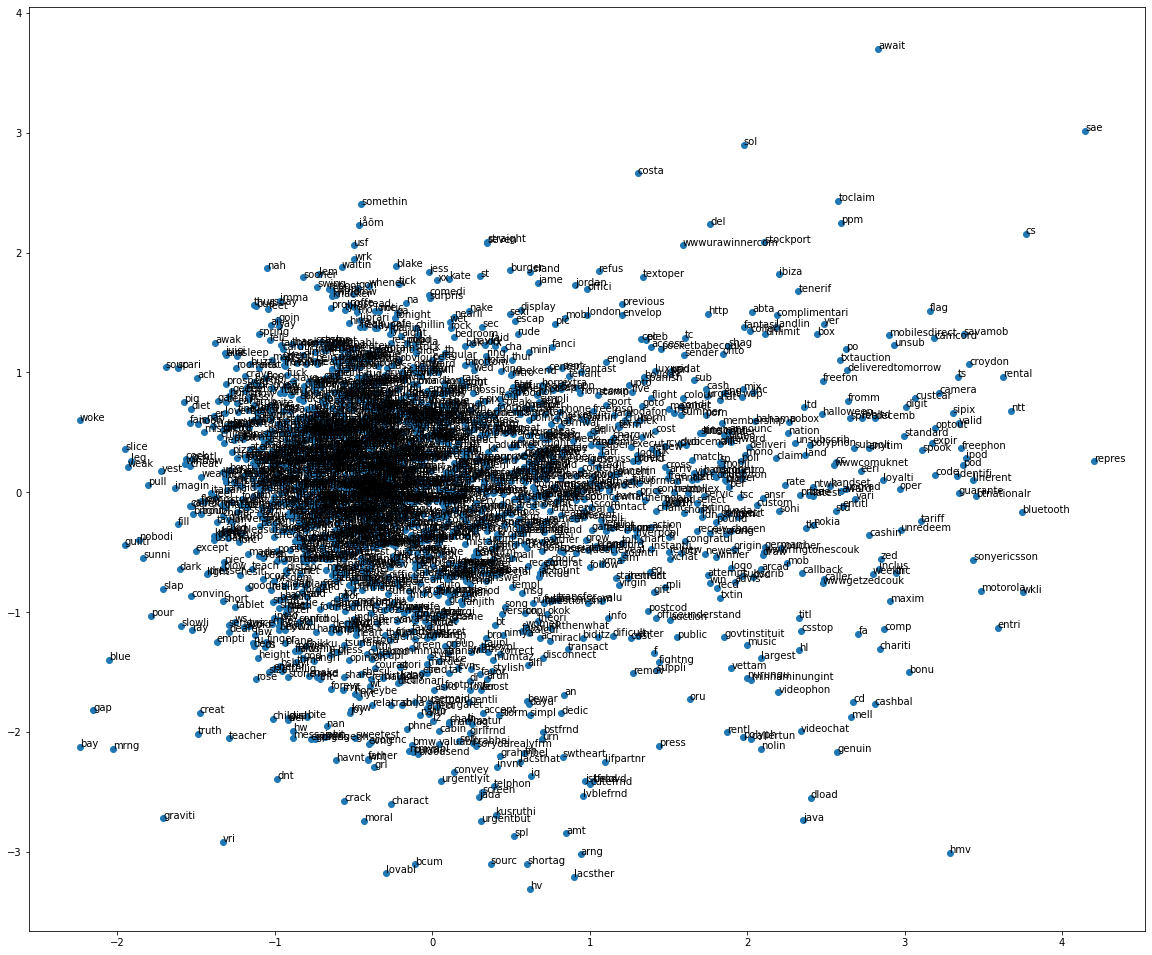

In [76]:
plt.figure(figsize = (20, 17))
plt.scatter(result[:, 0], result[:, 1])
words = list(cbow.wv.vocab)
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1])) # plot된 점에 word annotate 해주기
plt.show()

In [73]:
skip_data = skip_gram[skip_gram.wv.vocab] # skip gram 모델의 벡터들 가져오기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


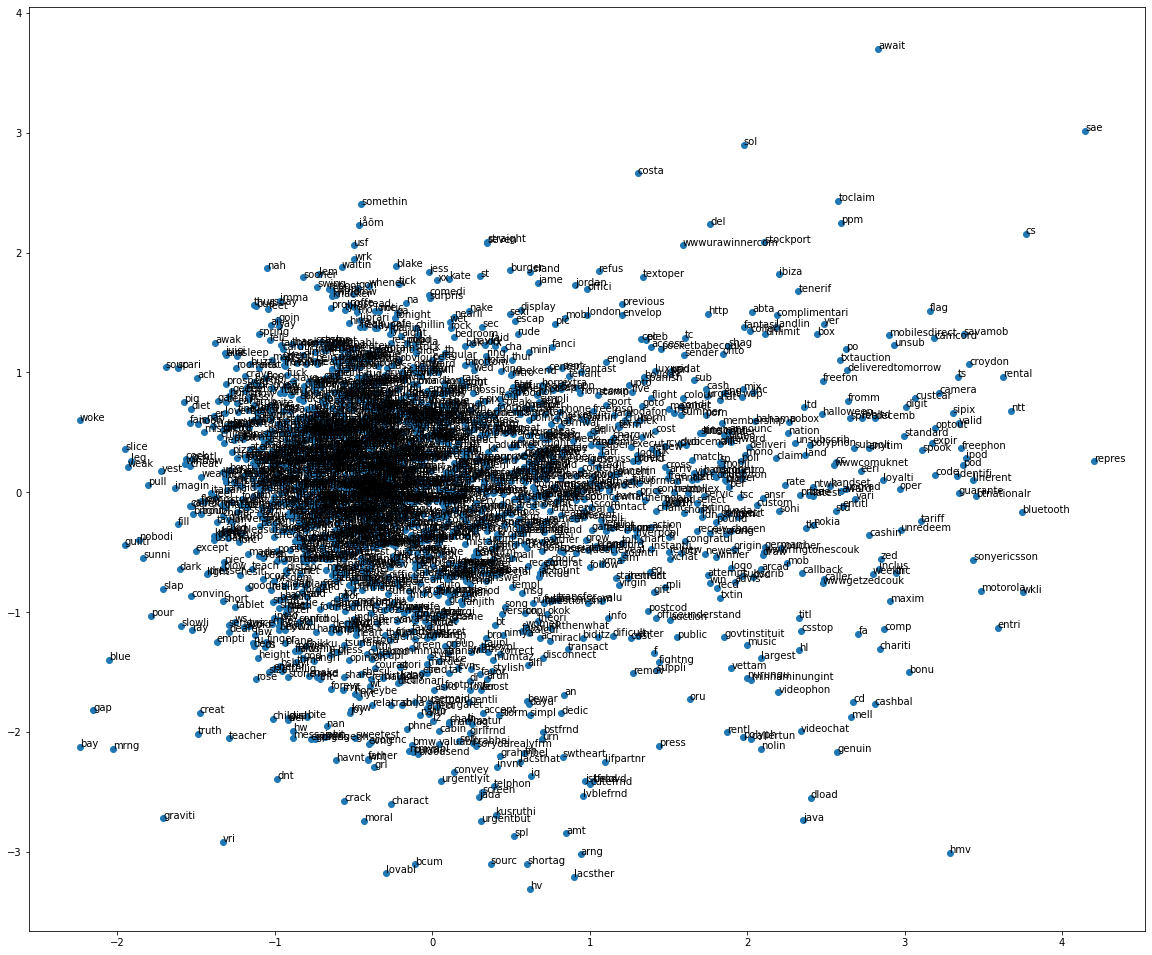

In [75]:
result = pca.fit_transform(skip_data) # word vectors 2차원 projection

plt.figure(figsize = (20, 17))
plt.scatter(result[:, 0], result[:, 1])
words = list(skip_gram.wv.vocab)
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1])) # plot된 점에 word annotate 해주기
plt.show()

In [78]:
fast_data = fast_text[fast_text.wv.vocab] # fast text 모델의 벡터들 가져오기기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


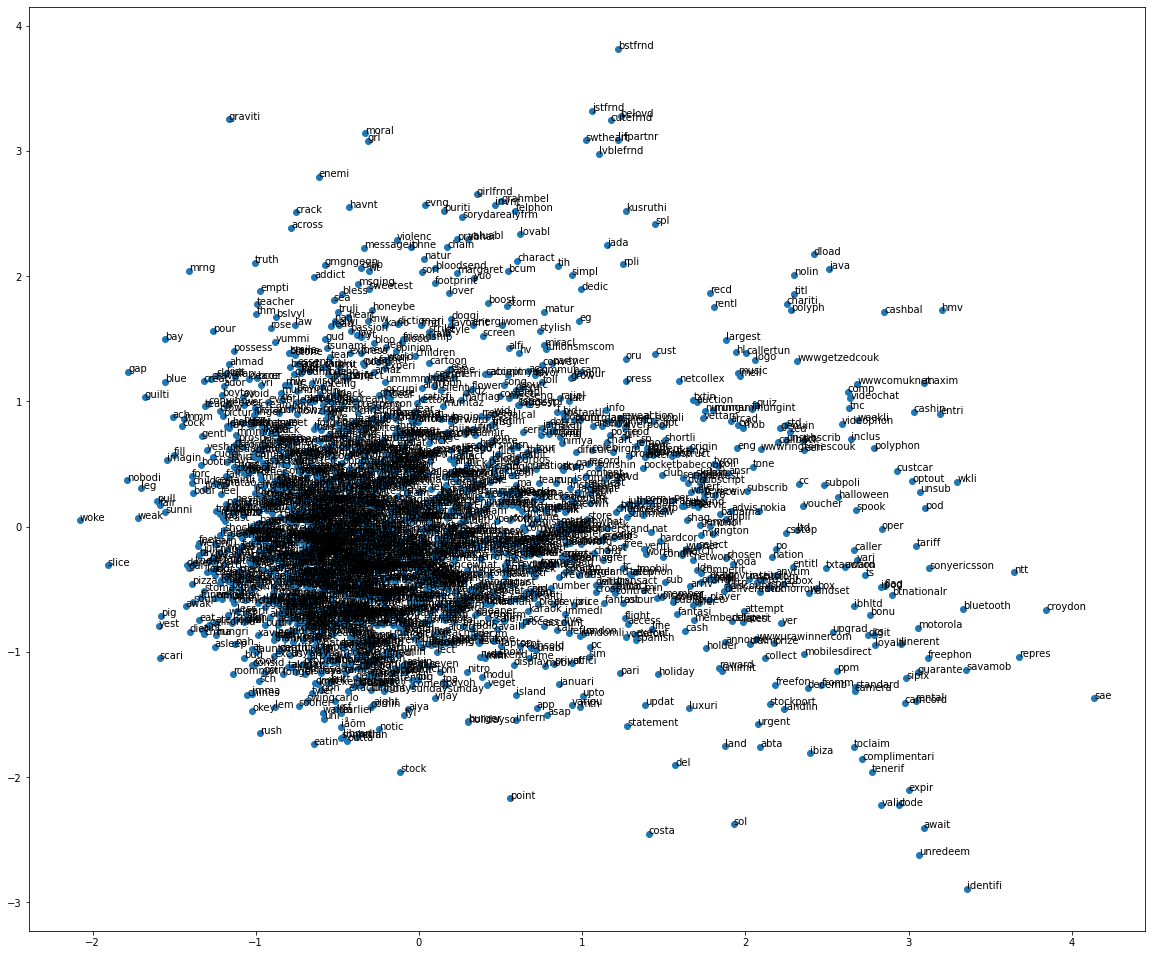

In [79]:
result = pca.fit_transform(fast_data) # word vectors 2차원 projection

plt.figure(figsize = (20, 17))
plt.scatter(result[:, 0], result[:, 1])
words = list(fast_text.wv.vocab)
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1])) # plot된 점에 word annotate 해주기
plt.show()

PCA를 통해 임베딩한 단어들을 시각화해 보았을 때 전체적으로 퍼져있기는 하지만  왼쪽 중앙부에 clustering이 되는 것을 확인할 수 있었다. 

이제까지의 process는 spam 메일과 non-spam 메일의 라벨링 유무와 상관 없이 전체 text 데이터를 기반으로 진행하였기에 전반적으로 넓은 영역에 걸쳐서 plot 되지 않았나 유추해 보았다.. 